<a href="https://colab.research.google.com/github/udaymarri/Brainwave_Matrix_Intern/blob/main/brainwave_matrix_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas textblob matplotlib seaborn nltk

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
import re
import string


In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import files
uploaded = files.upload()


Saving social_media_data.csv to social_media_data.csv


In [4]:
df = pd.read_csv(list(uploaded.keys())[0])


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [6]:
df['sentiment_score'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(label_sentiment)

df['date'] = pd.to_datetime(df['date'])


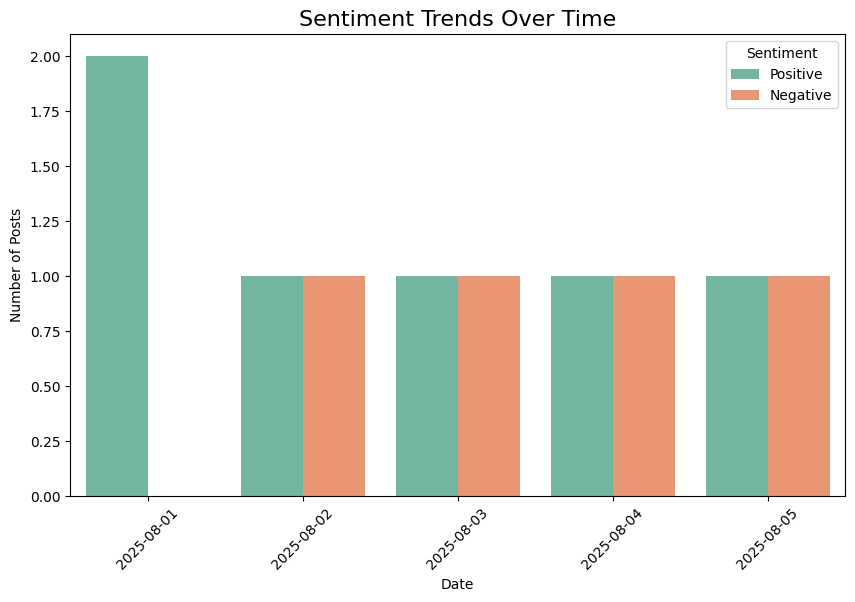

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='date', hue='sentiment', palette='Set2')
plt.title('Sentiment Trends Over Time', fontsize=16)
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()



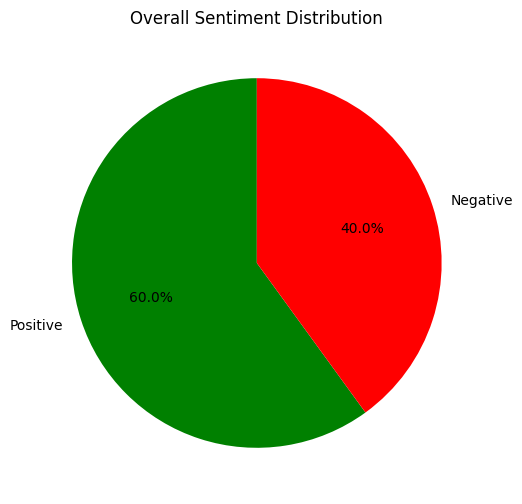

In [8]:
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray'], startangle=90)
plt.title('Overall Sentiment Distribution')
plt.ylabel('')
plt.show()
